In [ ]:
from google.colab import files
print("Silakan upload file dataset .mat Anda")
uploaded = files.upload()

Silakan upload file dataset .mat Anda


Saving data_set_IVa_av.mat to data_set_IVa_av.mat


In [ ]:
import os
print("File yang telah diupload:")
!ls -la

File yang telah diupload:
total 65264
drwxr-xr-x 1 root root     4096 Mar  7 00:58 .
drwxr-xr-x 1 root root     4096 Mar  7 00:51 ..
drwxr-xr-x 4 root root     4096 Mar  5 14:26 .config
-rw-r--r-- 1 root root 66811424 Mar  7 00:58 data_set_IVa_av.mat
drwxr-xr-x 1 root root     4096 Mar  5 14:26 sample_data


In [ ]:
# Impor library untuk analisis
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.fft import fft
from scipy.signal import butter, lfilter

In [ ]:
# Muat dataset (misalkan file pertama yang diunggah)
file_name = list(uploaded.keys())[0]
data = loadmat(file_name)

print("Kunci dalam dataset:", data.keys())

Kunci dalam dataset: dict_keys(['__header__', '__version__', '__globals__', 'mrk', 'nfo', 'cnt'])


In [ ]:
print("Isi nfo:", data['nfo'].dtype.names)

Isi nfo: ('name', 'fs', 'clab', 'xpos', 'ypos')


In [ ]:
clab = data['nfo']['clab'][0, 0][0]  # Label kanal
print("Label kanal:", [clab[i][0] for i in range(len(clab))])  # Tampilkan semua label

Label kanal: ['Fp1', 'AFp1', 'Fpz', 'AFp2', 'Fp2', 'AF7', 'AF3', 'AF4', 'AF8', 'FAF5', 'FAF1', 'FAF2', 'FAF6', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FFC7', 'FFC5', 'FFC3', 'FFC1', 'FFC2', 'FFC4', 'FFC6', 'FFC8', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'TP9', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'PCP7', 'PCP5', 'PCP3', 'PCP1', 'PCP2', 'PCP4', 'PCP6', 'PCP8', 'P9', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 'PPO7', 'PPO5', 'PPO1', 'PPO2', 'PPO6', 'PPO8', 'PO7', 'PO3', 'PO1', 'POz', 'PO2', 'PO4', 'PO8', 'OPO1', 'OPO2', 'O1', 'Oz', 'O2', 'OI1', 'OI2', 'I1', 'I2']


In [ ]:
fs = data['nfo']['fs'][0, 0][0, 0]  # Frekuensi sampel
print("Frekuensi sampel (Hz):", fs)

Frekuensi sampel (Hz): 100


In [ ]:
print("Isi nfo:", data['nfo'].dtype.names)
clab = data['nfo']['clab'][0, 0][0]
print("Label kanal dari nfo:", [clab[i][0] for i in range(len(clab))])
print("Dimensi cnt:", data['cnt'].shape)

Isi nfo: ('name', 'fs', 'clab', 'xpos', 'ypos')
Label kanal dari nfo: ['Fp1', 'AFp1', 'Fpz', 'AFp2', 'Fp2', 'AF7', 'AF3', 'AF4', 'AF8', 'FAF5', 'FAF1', 'FAF2', 'FAF6', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FFC7', 'FFC5', 'FFC3', 'FFC1', 'FFC2', 'FFC4', 'FFC6', 'FFC8', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'TP9', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'PCP7', 'PCP5', 'PCP3', 'PCP1', 'PCP2', 'PCP4', 'PCP6', 'PCP8', 'P9', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 'PPO7', 'PPO5', 'PPO1', 'PPO2', 'PPO6', 'PPO8', 'PO7', 'PO3', 'PO1', 'POz', 'PO2', 'PO4', 'PO8', 'OPO1', 'OPO2', 'O1', 'Oz', 'O2', 'OI1', 'OI2', 'I1', 'I2']
Dimensi cnt: (283042, 118)


In [ ]:
# Cari indeks C4
channel_index = None
for i, label in enumerate(clab):
    if label[0] == 'C4':  # Cari C4 yang tepat
        print(f"Indeks C4: {i}, Label: {label[0]}")
        channel_index = i
        break
else:
    print("C4 tidak ditemukan, gunakan indeks default 55")
    channel_index = 55

print(f"Label kanal {channel_index}: {clab[channel_index][0]}")

Indeks C4: 55, Label: C4
Label kanal 55: C4


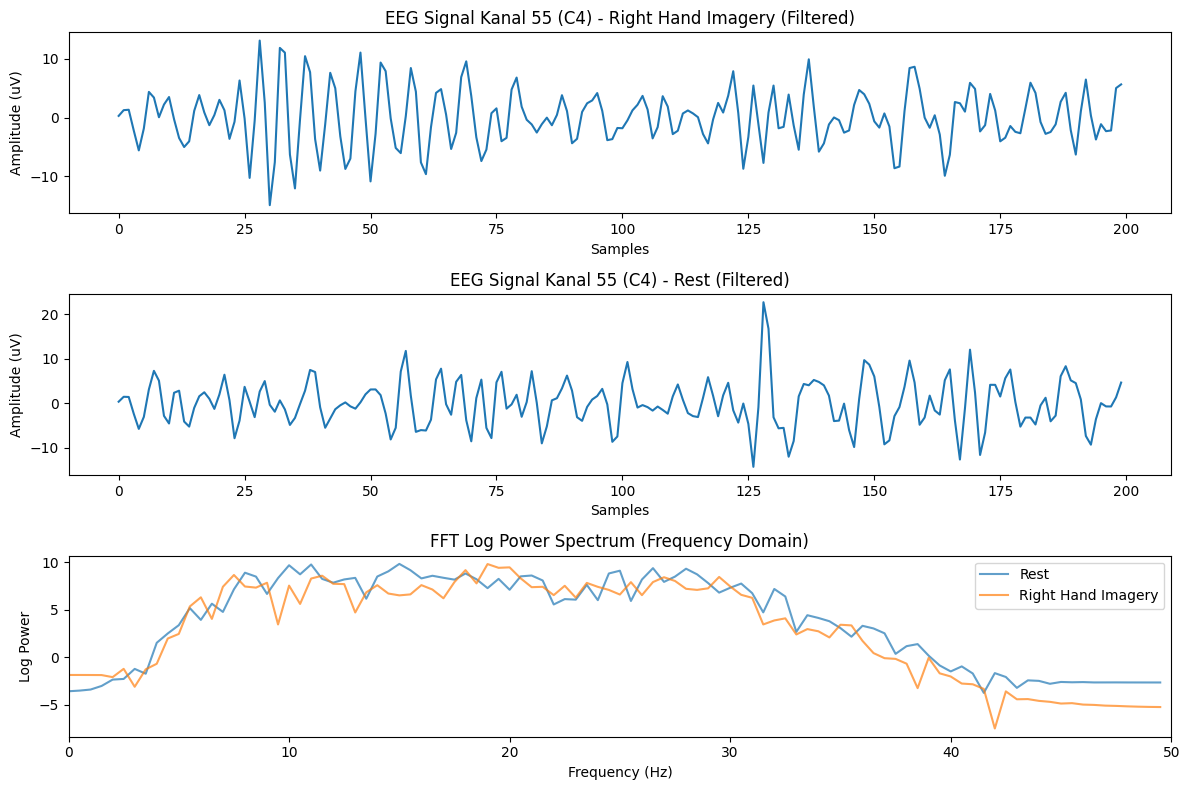

In [ ]:
# Sinkronkan dengan mrk untuk right hand
mrk_pos = data['mrk'][0, 0]['pos'][0]
mrk_y = data['mrk'][0, 0]['y'][0]
right_hand_indices = np.where(mrk_y == 1)[0]
fs = data['nfo']['fs'][0, 0][0, 0]

# Ambil segmen imaginasi (2 detik, mulai 1 detik setelah isyarat)
if len(right_hand_indices) > 0:
    start_sample_imagery = mrk_pos[right_hand_indices[0]] + int(1.0 * fs)
    signal_imagery = data['cnt'][start_sample_imagery:start_sample_imagery + 200, channel_index] * 0.1
else:
    print("Tidak ada trial right hand, gunakan segmen awal")
    signal_imagery = data['cnt'][:200, channel_index] * 0.1

# Ambil segmen istirahat (2 detik sebelum isyarat)
start_sample_rest = mrk_pos[right_hand_indices[0]] - int(2.0 * fs)
signal_rest = data['cnt'][start_sample_rest:start_sample_rest + 200, channel_index] * 0.1

# Filter sinyal
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

signal_imagery_filtered = bandpass_filter(signal_imagery, 8, 30, fs, order=5)
signal_rest_filtered = bandpass_filter(signal_rest, 8, 30, fs, order=5)

# Hitung FFT untuk kedua segmen
n = len(signal_imagery_filtered)
window = np.hamming(n)

# FFT untuk imaginasi
signal_imagery_windowed = signal_imagery_filtered * window
fft_imagery = fft(signal_imagery_windowed)
power_imagery = np.log(np.abs(fft_imagery[:n//2])**2)

# FFT untuk istirahat
signal_rest_windowed = signal_rest_filtered * window
fft_rest = fft(signal_rest_windowed)
power_rest = np.log(np.abs(fft_rest[:n//2])**2)

freq = np.fft.fftfreq(n, 1/fs)
freq_positive = freq[:n//2]

# Visualisasi
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(signal_imagery_filtered)
plt.title(f'EEG Signal Kanal {channel_index} ({clab[channel_index][0]}) - Right Hand Imagery (Filtered)')
plt.ylabel('Amplitude (uV)')
plt.xlabel('Samples')

plt.subplot(3, 1, 2)
plt.plot(signal_rest_filtered)
plt.title(f'EEG Signal Kanal {channel_index} ({clab[channel_index][0]}) - Rest (Filtered)')
plt.ylabel('Amplitude (uV)')
plt.xlabel('Samples')

plt.subplot(3, 1, 3)
plt.plot(freq_positive, power_rest, label='Rest', alpha=0.7)
plt.plot(freq_positive, power_imagery, label='Right Hand Imagery', alpha=0.7)
plt.title('FFT Log Power Spectrum (Frequency Domain)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Log Power')
plt.xlim(0, 50)
plt.legend()
plt.tight_layout()
plt.show()